## 1. Setup and Environment Preperation

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is i

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [3]:
import os
import json
import regex as re

In [4]:
from datasets import Dataset, DatasetDict

## 2. Data Loading and Preprocessing

In [5]:
train_set = load_dataset("mwritescode/slither-audited-smart-contracts", 'big-multilabel', split='train', verification_mode='no_checks', trust_remote_code=True)
test_set = load_dataset("mwritescode/slither-audited-smart-contracts", 'big-multilabel', split='test', verification_mode='no_checks', trust_remote_code=True)
val_set = load_dataset("mwritescode/slither-audited-smart-contracts", 'big-multilabel', split='validation', verification_mode='no_checks', trust_remote_code=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

slither-audited-smart-contracts.py:   0%|          | 0.00/8.00k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

contracts0.parquet:   0%|          | 0.00/203M [00:00<?, ?B/s]

contracts1.parquet:   0%|          | 0.00/197M [00:00<?, ?B/s]

contracts2.parquet:   0%|          | 0.00/193M [00:00<?, ?B/s]

contracts3.parquet:   0%|          | 0.00/224M [00:00<?, ?B/s]

contracts4.parquet:   0%|          | 0.00/227M [00:00<?, ?B/s]

contracts5.parquet:   0%|          | 0.00/232M [00:00<?, ?B/s]

contracts6.parquet:   0%|          | 0.00/230M [00:00<?, ?B/s]

contracts7.parquet:   0%|          | 0.00/233M [00:00<?, ?B/s]

contracts8.parquet:   0%|          | 0.00/4.04M [00:00<?, ?B/s]

label_mappings.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

big-splits.csv:   0%|          | 0.00/4.97M [00:00<?, ?B/s]

small-splits.csv:   0%|          | 0.00/659k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/79641 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/15972 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10861 [00:00<?, ? examples/s]

In [6]:
FRACTION = 1

train_df = train_set.to_pandas().sample(frac=FRACTION, random_state=420)
test_df = test_set.to_pandas().sample(frac=FRACTION, random_state=420)
val_df = val_set.to_pandas().sample(frac=FRACTION, random_state=420)

In [7]:
train_df['dataset'] = 'train'
test_df['dataset'] = 'test'
val_df['dataset'] = 'val'

In [8]:
train_df.info(), test_df.info(), val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79641 entries, 44384 to 11185
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   address      79641 non-null  object
 1   source_code  79641 non-null  object
 2   bytecode     79641 non-null  object
 3   slither      79641 non-null  object
 4   dataset      79641 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 15972 entries, 7519 to 11185
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   address      15972 non-null  object
 1   source_code  15972 non-null  object
 2   bytecode     15972 non-null  object
 3   slither      15972 non-null  object
 4   dataset      15972 non-null  object
dtypes: object(5)
memory usage: 748.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 10861 entries, 2114 to 4486
Data columns (total 5 columns):
 #   Column       Non-Null

(None, None, None)

In [9]:
train_df['source_length'] = train_df['source_code'].apply(len)
test_df['source_length'] = test_df['source_code'].apply(len)
val_df['source_length'] = val_df['source_code'].apply(len)

In [10]:
combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106474 entries, 0 to 106473
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        106474 non-null  object
 1   source_code    106474 non-null  object
 2   bytecode       106474 non-null  object
 3   slither        106474 non-null  object
 4   dataset        106474 non-null  object
 5   source_length  106474 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 4.9+ MB


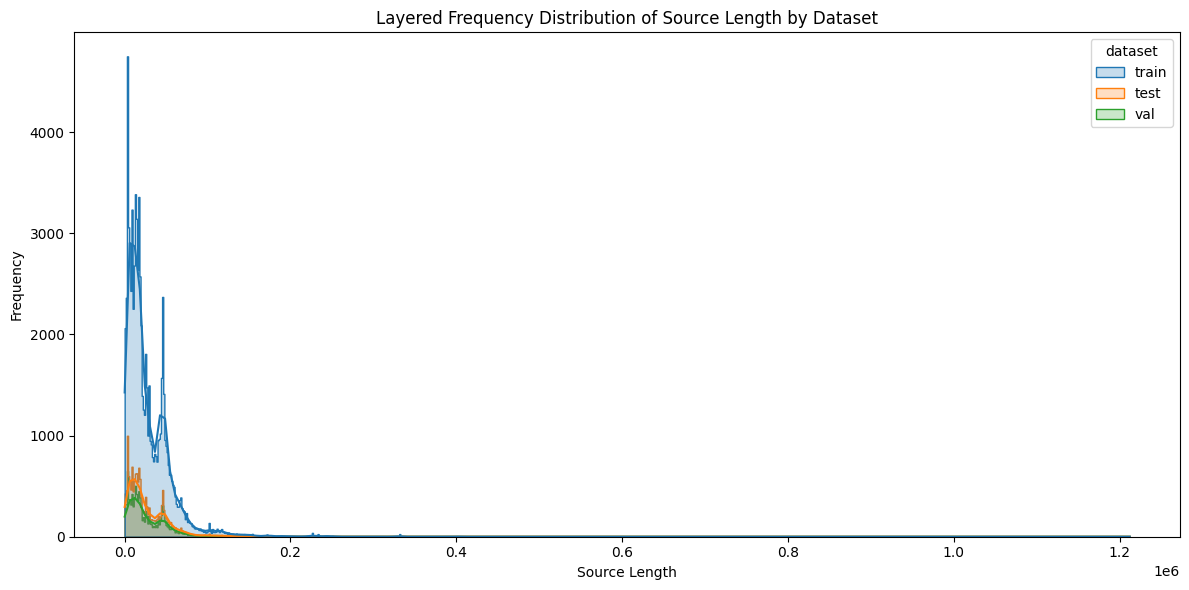

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='source_length', hue='dataset', element='step', kde=True)

plt.title('Layered Frequency Distribution of Source Length by Dataset')
plt.xlabel('Source Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [12]:
train_df = train_df[train_df['source_length'] <= 4000]
test_df = test_df[test_df['source_length'] <= 4000]
val_df = val_df[val_df['source_length'] <= 4000]
combined_df = combined_df[combined_df['source_length'] <= 4000]

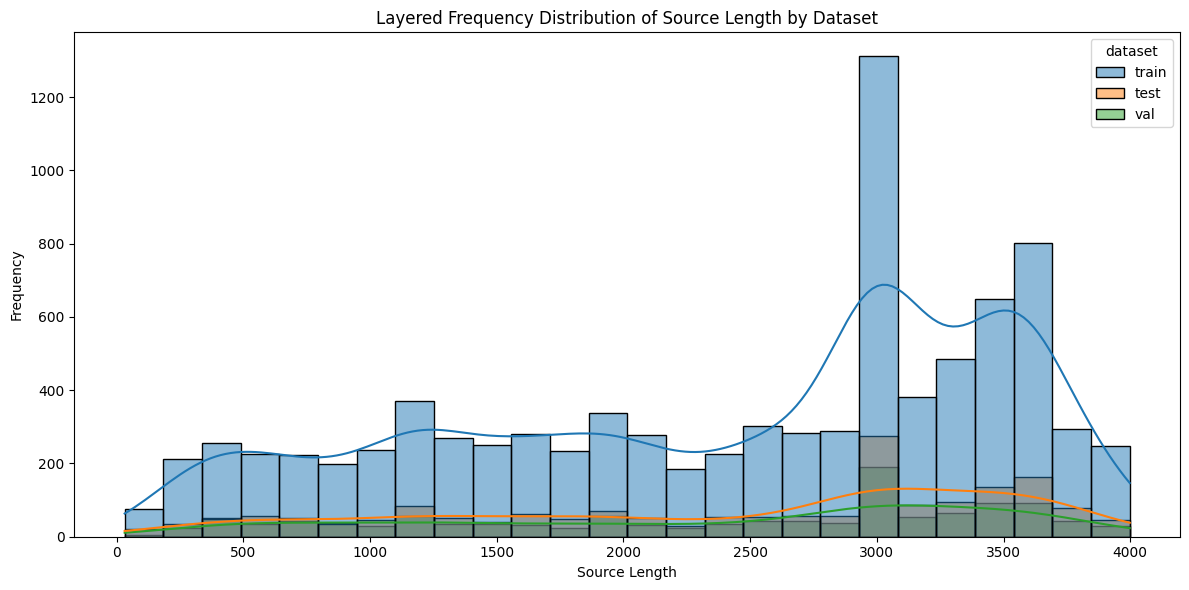

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='source_length', hue='dataset', element='bars', kde=True)

plt.title('Layered Frequency Distribution of Source Length by Dataset')
plt.xlabel('Source Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [14]:
train_df.info(), test_df.info(), val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8902 entries, 43559 to 78840
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   address        8902 non-null   object
 1   source_code    8902 non-null   object
 2   bytecode       8902 non-null   object
 3   slither        8902 non-null   object
 4   dataset        8902 non-null   object
 5   source_length  8902 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 486.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 1694 to 4486
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   address        1830 non-null   object
 1   source_code    1830 non-null   object
 2   bytecode       1830 non-null   object
 3   slither        1830 non-null   object
 4   dataset        1830 non-null   object
 5   source_length  1830 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 100.1+ K

(None, None, None)

In [15]:
sample = """// SPDX-License-Identifier: MIT
pragma solidity ^0.8.0;

contract SampleContract is Ownable {
    event Deposited(address indexed sender, uint amount);
    event Withdrawn(address indexed receiver, uint amount);

    uint public balance;
    address private admin;

    constructor() {
        balance = 0;
    }

    function deposit() public payable {
        balance += msg.value;
        emit Deposited(msg.sender, msg.value);
    }

    function withdraw(uint amount) public onlyOwner {
        require(amount <= balance, "Insufficient balance");
        payable(msg.sender).transfer(amount);
        balance -= amount;
        emit Withdrawn(msg.sender, amount);
    }

    function getBalance() public view returns (uint) {
        return balance;
    }
}"""

In [16]:
def extract_fragments(source_code: str) -> dict:
    """
    Extract code fragments such as security-sensitive functions, events, variable declarations, and contract definitions.
    """
    patterns = {
        "security_functions": r"function\s+[^\{]*\{[^}]*?(?:transfer|call|send|require|assert)[^}]*\}",
        "events": r"event\s+[^{;]+?;",
        "variables": r"(?:\w+\s+)*(?:uint|int|address|bool|string|bytes[0-9]*|mapping\s*\(.*?\)\s*=>\s*.*?\)|\w+)\s+(?:public|private|internal|external)\s+\w+\s*(?:=.*?)?\s*;",
        "contract_definitions": r"contract\s+\w+\s*(?:is\s+[^{]+)?\{",
    }

    fragments = {key: re.findall(pattern, source_code) for key, pattern in patterns.items()}
    return fragments

In [17]:
temp0 = extract_fragments(sample)
for k, v in temp0.items():
    print(f"{k}:\n", "\n".join(v), "\n")

security_functions:
 function deposit() public payable {
        balance += msg.value;
        emit Deposited(msg.sender, msg.value);
    }
function withdraw(uint amount) public onlyOwner {
        require(amount <= balance, "Insufficient balance");
        payable(msg.sender).transfer(amount);
        balance -= amount;
        emit Withdrawn(msg.sender, amount);
    } 

events:
 event Deposited(address indexed sender, uint amount);
event Withdrawn(address indexed receiver, uint amount); 

variables:
 uint public balance;
address private admin; 

contract_definitions:
 contract SampleContract is Ownable { 



In [18]:
def clean_fragments(fragments: dict) -> dict:
    """
    Normalize whitespace in extracted code fragments.
    """
    cleaned = {}
    for key, fragment_list in fragments.items():
        cleaned[key] = [re.sub(r'\s+', ' ', fragment).strip() for fragment in fragment_list]
    return cleaned

In [19]:
temp1 = clean_fragments(temp0)
for k, v in temp1.items():
    print(f"{k}:\n", "\n".join(v), "\n")

security_functions:
 function deposit() public payable { balance += msg.value; emit Deposited(msg.sender, msg.value); }
function withdraw(uint amount) public onlyOwner { require(amount <= balance, "Insufficient balance"); payable(msg.sender).transfer(amount); balance -= amount; emit Withdrawn(msg.sender, amount); } 

events:
 event Deposited(address indexed sender, uint amount);
event Withdrawn(address indexed receiver, uint amount); 

variables:
 uint public balance;
address private admin; 

contract_definitions:
 contract SampleContract is Ownable { 



In [20]:
def organize_fragments(fragments: dict) -> dict:
    """
    Organize fragments by their type or associated contract.
    """
    organized = {}

    for key, items in fragments.items():
        for item in items:
            # Group contract definitions by name
            if key == "contract_definitions":
                match = re.search(r'contract\s+(\w+)', item)
                if match:
                    contract_name = match.group(1)
                    organized.setdefault(contract_name, set()).add(item)
            else:
                organized.setdefault(key, set()).add(item)

    return organized

In [21]:
temp2 = organize_fragments(temp1)
for k, v in temp2.items():
    print(f"{k}:\n", "\n".join(v), "\n")

security_functions:
 function deposit() public payable { balance += msg.value; emit Deposited(msg.sender, msg.value); }
function withdraw(uint amount) public onlyOwner { require(amount <= balance, "Insufficient balance"); payable(msg.sender).transfer(amount); balance -= amount; emit Withdrawn(msg.sender, amount); } 

events:
 event Withdrawn(address indexed receiver, uint amount);
event Deposited(address indexed sender, uint amount); 

variables:
 uint public balance;
address private admin; 

SampleContract:
 contract SampleContract is Ownable { 



In [22]:
def format_fragments(organized: dict) -> str:
    """
    Format the organized fragments into a human-readable string format.
    """
    formatted = []
    for category, items in organized.items():
        formatted.append(f"{category}:\n" + "\n".join(f"  {item}" for item in sorted(items)))
    return "\n\n".join(formatted)

In [23]:
temp3 = format_fragments(temp2)
print(temp3)

security_functions:
  function deposit() public payable { balance += msg.value; emit Deposited(msg.sender, msg.value); }
  function withdraw(uint amount) public onlyOwner { require(amount <= balance, "Insufficient balance"); payable(msg.sender).transfer(amount); balance -= amount; emit Withdrawn(msg.sender, amount); }

events:
  event Deposited(address indexed sender, uint amount);
  event Withdrawn(address indexed receiver, uint amount);

variables:
  address private admin;
  uint public balance;

SampleContract:
  contract SampleContract is Ownable {


In [24]:
def abstract_code(source: str) -> str:
    """
    Abstract away specifics such as parameters and comments from source code.
    """
    # Remove comments
    code = re.sub(r'/\*.*?\*/', '', source, flags=re.DOTALL)
    code = re.sub(r'//.*', '', code)

    # Abstract events and functions
    code = re.sub(r'event\s+(\w+)\s*\(.*?\);', r'event \1(params);', code)
    code = re.sub(r'function\s+(\w+)\s*\(.*?\)\s*(.*?)\{[^}]*\}', r'function \1(params) \2 { ... }', code, flags=re.DOTALL)

    # Normalize spacing and strip
    code = re.sub(r'\n\s*\n', '\n', code)
    return code.strip()

In [25]:
temp4 = abstract_code(sample)
print(temp4)

pragma solidity ^0.8.0;
contract SampleContract is Ownable {
    event Deposited(params);
    event Withdrawn(params);
    uint public balance;
    address private admin;
    constructor() {
        balance = 0;
    }
    function deposit(params) public payable  { ... }
    function withdraw(params) public onlyOwner  { ... }
    function getBalance(params) public view returns (uint)  { ... }
}


In [26]:
def process_source_code(source_code: str) -> str:
    """
    Complete processing pipeline: extract, clean, organize, format, and abstract the Solidity source code.
    """
    fragments = extract_fragments(source_code)
    cleaned_fragments = clean_fragments(fragments)
    organized_fragments = organize_fragments(cleaned_fragments)
    formatted_code = format_fragments(organized_fragments)
    return formatted_code

In [27]:
train_df['processed_source_code'] = train_df['source_code'].apply(process_source_code)
test_df['processed_source_code'] = test_df['source_code'].apply(process_source_code)
val_df['processed_source_code'] = val_df['source_code'].apply(process_source_code)

In [28]:
train_df['abstract_source_code'] = train_df['processed_source_code'].apply(abstract_code)
test_df['abstract_source_code'] = test_df['processed_source_code'].apply(abstract_code)
val_df['abstract_source_code'] = val_df['processed_source_code'].apply(abstract_code)

In [29]:
train_df.info(), test_df.info(), val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8902 entries, 43559 to 78840
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   address                8902 non-null   object
 1   source_code            8902 non-null   object
 2   bytecode               8902 non-null   object
 3   slither                8902 non-null   object
 4   dataset                8902 non-null   object
 5   source_length          8902 non-null   int64 
 6   processed_source_code  8902 non-null   object
 7   abstract_source_code   8902 non-null   object
dtypes: int64(1), object(7)
memory usage: 625.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1830 entries, 1694 to 4486
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   address                1830 non-null   object
 1   source_code            1830 non-null   object
 2   bytecode           

(None, None, None)

In [30]:
def convert_dataframe_to_dataset(df):
    df['slither'] = df['slither'].apply(lambda x: eval(x) if isinstance(x, str) else x)

    # Explode the dataframe
    df_exploded = df.explode('slither').reset_index(drop=True)

    # Convert to Dataset
    dataset = Dataset.from_pandas(pd.DataFrame(df_exploded))
    return dataset

In [31]:
train_dataset = convert_dataframe_to_dataset(train_df)
test_dataset = convert_dataframe_to_dataset(test_df)
val_dataset = convert_dataframe_to_dataset(val_df)

In [32]:
datasets = DatasetDict({
    "train": train_dataset,
    "test": test_dataset,
    "validation": val_dataset
})

In [33]:
datasets

DatasetDict({
    train: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither', 'dataset', 'source_length', 'processed_source_code', 'abstract_source_code'],
        num_rows: 10426
    })
    test: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither', 'dataset', 'source_length', 'processed_source_code', 'abstract_source_code'],
        num_rows: 2178
    })
    validation: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither', 'dataset', 'source_length', 'processed_source_code', 'abstract_source_code'],
        num_rows: 1451
    })
})

In [42]:
df_train = datasets['train'].to_pandas()
df_test = datasets['test'].to_pandas()
df_val = datasets['validation'].to_pandas()

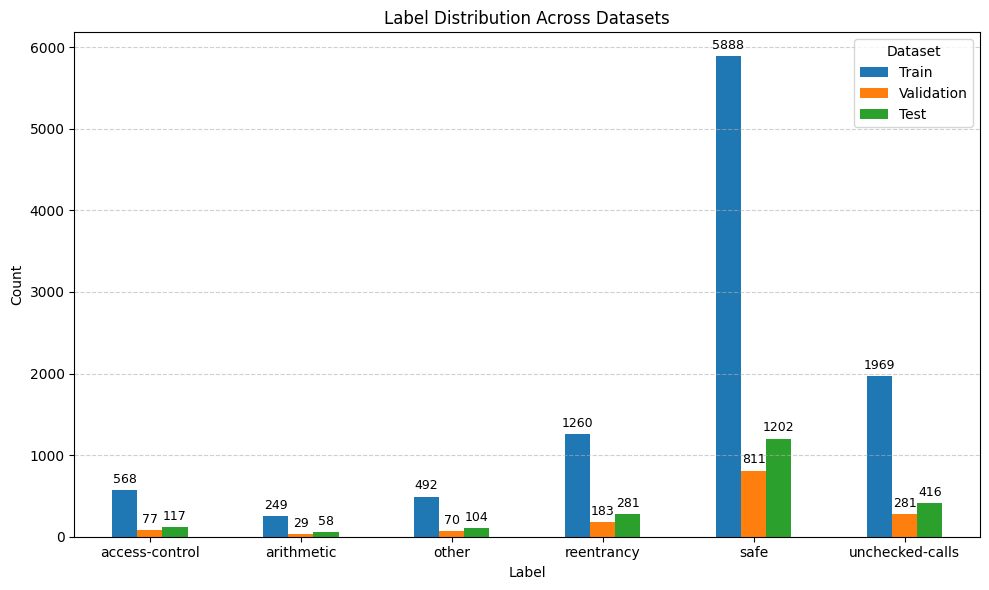

In [46]:
# Label mapping
LABELS = {
    0: 'access-control',
    1: 'arithmetic',
    2: 'other',
    3: 'reentrancy',
    4: 'safe',
    5: 'unchecked-calls'
}

# Assume each DataFrame has a column named 'label'
train_counts = df_train['slither'].map(LABELS).value_counts().sort_index()
val_counts = df_val['slither'].map(LABELS).value_counts().sort_index()
test_counts = df_test['slither'].map(LABELS).value_counts().sort_index()


# Combine into one DataFrame for plotting
label_counts = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).fillna(0).astype(int)

# Plot
ax = label_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Label Distribution Across Datasets')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Add count annotations
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

plt.show()

In [ ]:
# Save the dataset
save_path = "/content/drive/MyDrive/Colab Notebooks/HYBRID/dataset/hfDataset/"
datasets.save_to_disk(save_path)


Saving the dataset (0/1 shards):   0%|          | 0/10426 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2178 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1451 [00:00<?, ? examples/s]

In [ ]:
datasets_ = DatasetDict.load_from_disk(save_path)
datasets_

DatasetDict({
    train: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither', 'dataset', 'source_length', 'processed_source_code', 'abstract_source_code'],
        num_rows: 10426
    })
    test: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither', 'dataset', 'source_length', 'processed_source_code', 'abstract_source_code'],
        num_rows: 2178
    })
    validation: Dataset({
        features: ['address', 'source_code', 'bytecode', 'slither', 'dataset', 'source_length', 'processed_source_code', 'abstract_source_code'],
        num_rows: 1451
    })
})